<a href="https://colab.research.google.com/github/NOOTNOOTPINGUUU/NOOTNOOTPINGUUU.github.io/blob/main/2025AIcourse/%E7%94%9F%E6%88%90AI%E5%8A%9F%E8%AA%B22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**載入套件**

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
#神經網路套件
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

#數據分析、圖像套件
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#web app
import gradio as gr

#**數據庫載入與調適**

In [ ]:
# 加載數據
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 檢查數據形狀
print(f"訓練集數量、形狀: {x_train}, 測試集數量、形狀: {x_test}")

訓練集數量、形狀: (60000, 28, 28), 測試集數量、形狀: (10000, 28, 28)


In [ ]:
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(X, cmap = 'Greys')
    print(f"Label: {y_train[n]}")

In [ ]:
from ipywidgets import interact_manual
interact_manual(show_xy, n=(0,59999));


interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

In [ ]:
def show_data(n = 100):
    X = x_train[n]
    print(X)

In [ ]:
interact_manual(show_data, n=(0,59999));


interactive(children=(IntSlider(value=100, description='n', max=59999), Button(description='Run Interact', sty…

In [ ]:
# 影像輸入格式整理
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#**神經網路建立與評估**

In [ ]:
N1 = 128
N2 = 64
N3 = 32

In [ ]:
# 建立神經網路
model = Sequential([
    Dense(N1, input_dim=784, activation='relu'),# 隱藏層
    Dense(N2, activation='relu'),  # 隱藏層
    Dense(N3, activation='relu'),  # 隱藏層
    Dense(10, activation='softmax') # 輸出層 (10 類)
])

# 編譯模型
model.compile(optimizer='adam', #用adam優化準確度
              loss='categorical_crossentropy', #更換損失函數到categorical_crossentropy
              metrics=['accuracy'])

# 顯示模型架構
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10) #訓練

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8582 - loss: 0.4718
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9674 - loss: 0.1059
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0747
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9828 - loss: 0.0536
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9854 - loss: 0.0460
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9886 - loss: 0.0357
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0303
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0255
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9928 - loss: 0.0220
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0221


In [ ]:
loss, acc = model.evaluate(x_test, y_test)  #測試並回傳正確率
print(f"測試資料正確率 {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.1227
測試資料正確率 97.56%


In [ ]:
predict = np.argmax(model.predict(x_test), axis=-1)
predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.1227
loss: 0.10112465173006058
正確率 0.975600004196167


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


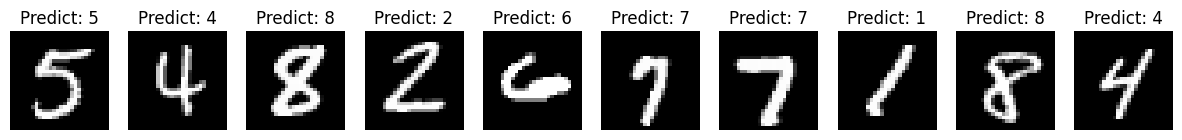

In [ ]:
# 隨機挑選 10 張測試圖片
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)
test_images = x_test[indices]

# 進行預測
predictions = model.predict(test_images)

# 顯示預測結果
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(test_images[i].reshape(28,28), cmap='gray')
    ax.set_title(f"Predict: {np.argmax(predictions[i])}")
    ax.axis("off")
plt.show()

#**用Gradio應用展示**

In [ ]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://35bf2697066d184261.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
